* Regression Problem
    - Output Layer Configuration: One node with a linear activation unit.
    - Loss Function: Mean Squared Error (MSE).

* Binary Classification Problem
    - Output Layer Configuration: One node with a sigmoid activation unit.
    - Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

* Multi-Class Classification Problem
    - Output Layer Configuration: One node for each class using the softmax activation function.
    - Loss Function: Cross-Entropy, also referred to as Logarithmic loss.

In [2]:
# mlp for regression with mse loss function
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot

Mean Squared Error Loss

In [18]:
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)

In [15]:
print(type(X), type(y), "\n",
      X.shape, y.shape, "\n",
      len(X), len(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> 
 (1000, 20) (1000,) 
 1000 1000


In [19]:
# standardize dataset
# note that normalization of dataset should be done after splitting, here it's for simplicity
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y.reshape(len(y),1))[:,0]
print(type(X), type(y), "\n",
      X.shape, y.shape, "\n",
      len(X), len(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> 
 (1000, 20) (1000,) 
 1000 1000


In [20]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, trainy.shape, "\n",
      testX.shape, testy.shape)

(500, 20) (500,) 
 (500, 20) (500,)


In [23]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt)

In [25]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 9ms/step - loss: 4.1732e-05 - val_loss: 6.5654e-05
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 4.1327e-05 - val_loss: 6.1294e-05
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 3.8989e-05 - val_loss: 6.2136e-05
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 3.6629e-05 - val_loss: 6.1873e-05
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 3.3053e-05 - val_loss: 5.1309e-05
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 3.2402e-05 - val_loss: 5.1428e-05
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 2.9709e-05 - val_loss: 4.8293e-05
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 2.8640e-05 - val_loss: 4.4001e-05
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 2.8006e-05 - val_loss: 4.5481e-05
Epoch 10/100
16/16 [=================

In [26]:
# evaluate the model
train_mse = model.evaluate(trainX, trainy)
test_mse = model.evaluate(testX, testy)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

16/16 [==============================] - 0s 2ms/step - loss: 7.7557e-07
Train: 0.000, Test: 0.000


In [30]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

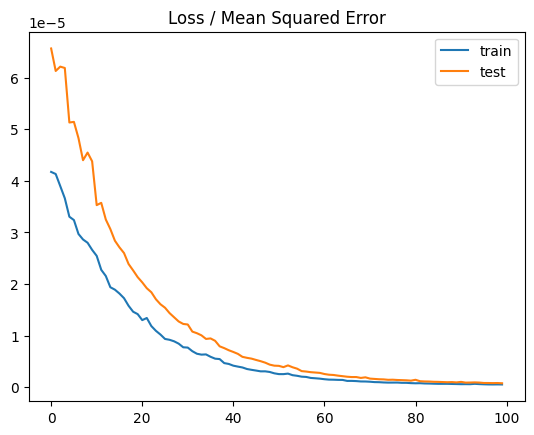

In [31]:
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Mean Squared Logarithmic Error Loss

In [33]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 27ms/step - loss: 0.3166 - mse: 2.3028 - val_loss: 0.2050 - val_mse: 2.2867
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1634 - mse: 2.6965 - val_loss: 0.2118 - val_mse: 3.3047
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1652 - mse: 3.0728 - val_loss: 0.2077 - val_mse: 2.9500
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1579 - mse: 2.5312 - val_loss: 0.1952 - val_mse: 2.3459
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1520 - mse: 2.1483 - val_loss: 0.1866 - val_mse: 2.0164
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1449 - mse: 1.7885 - val_loss: 0.1634 - val_mse: 1.5605
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1275 - mse: 1.2488 - val_loss: 0.1302 - val_mse: 1.0700
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 0.1037 - 

In [34]:
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy)
_, test_mse = model.evaluate(testX, testy)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

16/16 [==============================] - 0s 1ms/step - loss: 0.0022 - mse: 0.2214
Train: 0.190, Test: 0.221


In [35]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

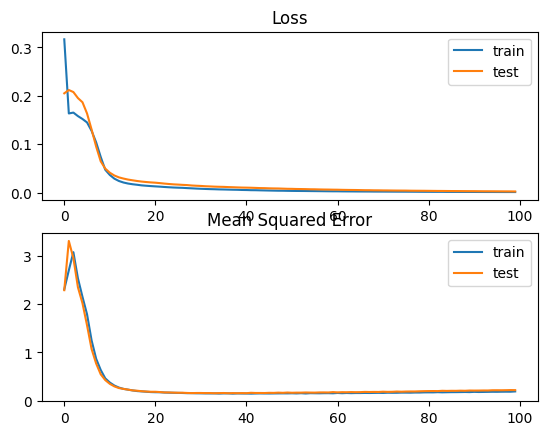

In [60]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

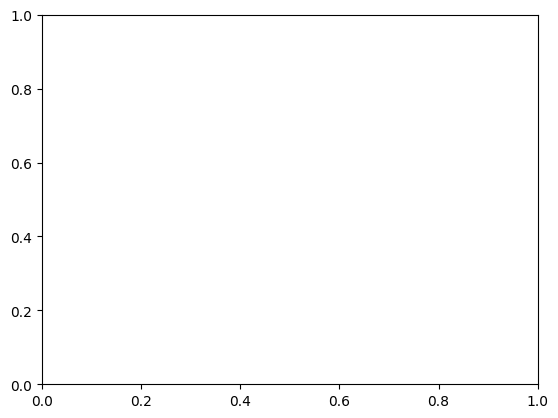

In [63]:
import matplotlib.pyplot as plt
# These are subplot grid parameters encoded as a single integer. 
#For example, "111" means "1x1 grid, first subplot" 
# and "234" means "2x3 grid, 4th subplot".
fig = plt.figure()
# add_subplot(111) is add_subplot(1, 1, 1)
fig.add_subplot(111)   #top left
plt.show()

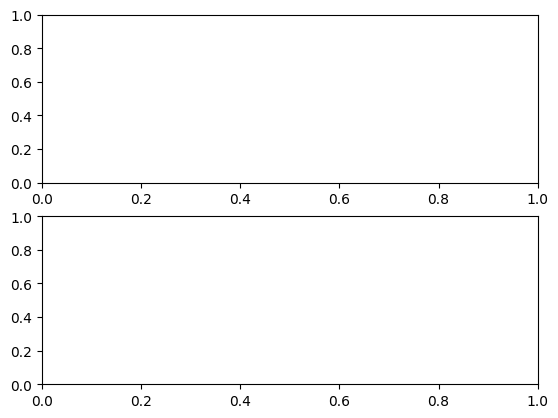

In [61]:
import matplotlib.pyplot as plt
# These are subplot grid parameters encoded as a single integer. 
#For example, "111" means "1x1 grid, first subplot" 
# and "234" means "2x3 grid, 4th subplot".
fig = plt.figure()
# add_subplot(211) is add_subplot(2, 1, 1)
fig.add_subplot(211)   #top left
fig.add_subplot(212)   #top right
plt.show()

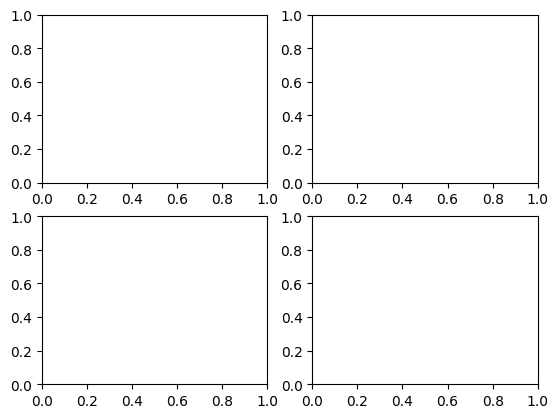

In [56]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.add_subplot(221)   #top left
fig.add_subplot(222)   #top right
fig.add_subplot(223)   #bottom left
fig.add_subplot(224)   #bottom right 
plt.show()

<Axes: >

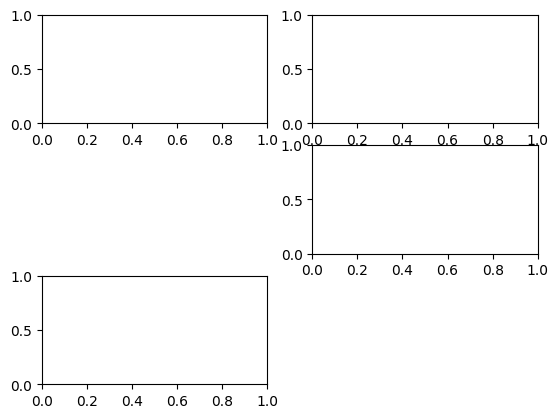

In [68]:
import matplotlib.pyplot as plt
plt.subplot(3,2,1)
plt.subplot(3,2,2)
# plt.subplot(3,2,3)
plt.subplot(3,2,4)
plt.subplot(3,2,5)


Binary Classification Loss Functions

In [73]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles, make_classification
from numpy import where
from matplotlib import pyplot
# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

In [77]:
print(type(X), type(y), "\n",
      X.shape, y.shape, "\n",
      len(X), len(y), "\n",
      y[:10])

<class 'numpy.ndarray'> <class 'numpy.ndarray'> 
 (1000, 2) (1000,) 
 1000 1000 
 [1 1 0 0 0 1 0 1 0 0]


In [80]:
import numpy as np
unique_values, counts = np.unique(y, return_counts=True)
unique_values

array([0, 1], dtype=int64)

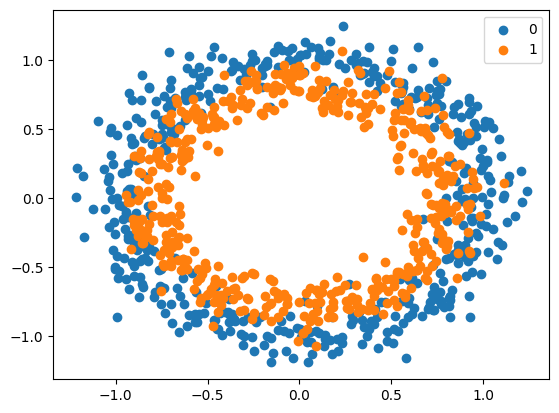

In [81]:
# select indices of points with each class label
for i in range(2):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [82]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [84]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 20ms/step - loss: 0.7676 - accuracy: 0.5040 - val_loss: 0.6976 - val_accuracy: 0.5340
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6957 - accuracy: 0.5200 - val_loss: 0.6798 - val_accuracy: 0.5100
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6795 - accuracy: 0.5120 - val_loss: 0.6772 - val_accuracy: 0.5660
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 0.6681 - accuracy: 0.6020 - val_loss: 0.6719 - val_accuracy: 0.5560
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6642 - accuracy: 0.5400 - val_loss: 0.6657 - val_accuracy: 0.5560
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6595 - accuracy: 0.6140 - val_loss: 0.6654 - val_accuracy: 0.6000
Epoch 7/200
16/16 [==============================] - 0s 7ms/step - loss: 0.6516 - accuracy: 0.6620 - val_loss: 0.6553 - val_accuracy: 0.6200
Epoch 8/200


16/16 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8520
Train: 0.846, Test: 0.852


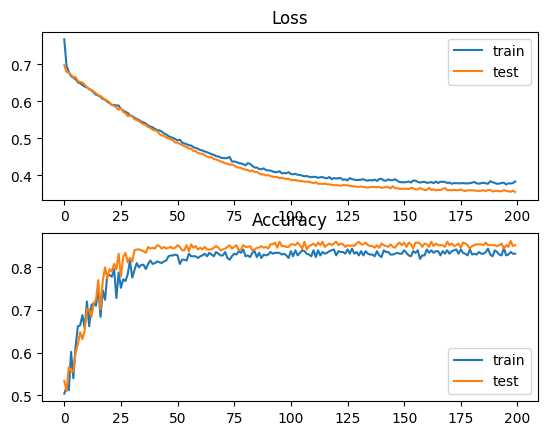

In [85]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy)
_, test_acc = model.evaluate(testX, testy)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Hinge Loss

In [87]:
# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change y from {0,1} to {-1,1}
y[np.where(y == 0)] = -1
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 19ms/step - loss: 0.9780 - accuracy: 0.0000e+00 - val_loss: 0.9647 - val_accuracy: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 0.9553 - accuracy: 0.0000e+00 - val_loss: 0.9674 - val_accuracy: 0.0000e+00
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 0.9358 - accuracy: 0.0000e+00 - val_loss: 0.9710 - val_accuracy: 0.0000e+00
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.9273 - accuracy: 0.0000e+00 - val_loss: 0.9614 - val_accuracy: 0.0000e+00
Epoch 5/200
16/16 [==============================] - 0s 7ms/step - loss: 0.9193 - accuracy: 0.0000e+00 - val_loss: 0.9493 - val_accuracy: 0.0000e+00
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 0.9087 - accuracy: 0.0300 - val_loss: 0.9513 - val_accuracy: 0.0200
Epoch 7/200
16/16 [==============================] - 0s 7ms/step - loss: 0.8881 - accuracy: 0.0300 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.4060
Train: 0.420, Test: 0.406


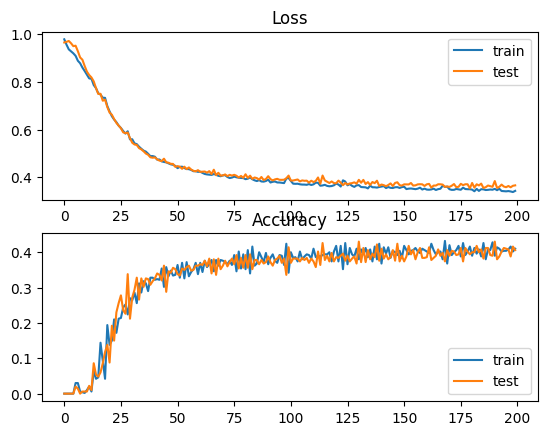

In [88]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy)
_, test_acc = model.evaluate(testX, testy)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Squared Hinge Loss

In [90]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 35ms/step - loss: 1.1924 - accuracy: 0.0420 - val_loss: 1.0700 - val_accuracy: 0.0000e+00
Epoch 2/200
16/16 [==============================] - 0s 7ms/step - loss: 0.9935 - accuracy: 0.0000e+00 - val_loss: 0.9357 - val_accuracy: 0.0000e+00
Epoch 3/200
16/16 [==============================] - 0s 7ms/step - loss: 0.9066 - accuracy: 0.0000e+00 - val_loss: 0.8448 - val_accuracy: 0.0000e+00
Epoch 4/200
16/16 [==============================] - 0s 7ms/step - loss: 0.8340 - accuracy: 0.0020 - val_loss: 0.7835 - val_accuracy: 0.0000e+00
Epoch 5/200
16/16 [==============================] - 0s 10ms/step - loss: 0.8588 - accuracy: 0.0360 - val_loss: 0.8148 - val_accuracy: 0.0100
Epoch 6/200
16/16 [==============================] - 0s 7ms/step - loss: 0.8188 - accuracy: 0.0400 - val_loss: 0.7551 - val_accuracy: 0.1260
Epoch 7/200
16/16 [==============================] - 0s 9ms/step - loss: 0.8499 - accuracy: 0.1020 - val_loss: 0.9663 - val_accu

16/16 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.3620
Train: 0.352, Test: 0.362


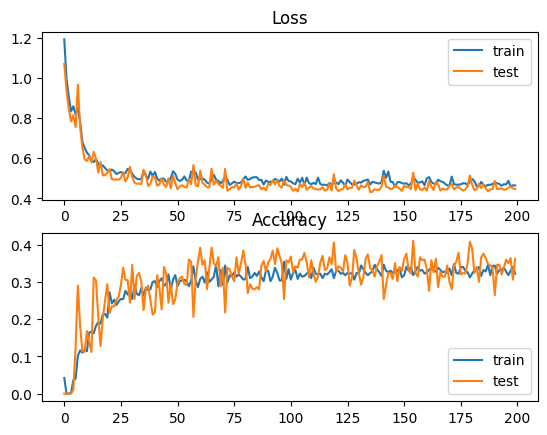

In [91]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy)
_, test_acc = model.evaluate(testX, testy)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Multi-Class Classification Loss Functions

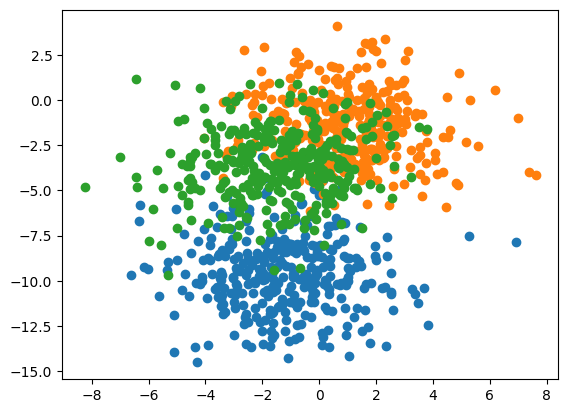

In [96]:
# scatter plot of blobs dataset
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot
# generate dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# select indices of points with each class label
for i in range(3):
	samples_ix = where(y == i)
	pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1])
pyplot.show()

In [97]:
print(type(X), type(y), "\n",
      X.shape, y.shape, "\n",
      len(X), len(y), "\n",
      y[:10])

<class 'numpy.ndarray'> <class 'numpy.ndarray'> 
 (1000, 2) (1000,) 
 1000 1000 
 [2 2 2 0 1 0 1 1 2 2]


In [98]:
import numpy as np
unique_values, counts = np.unique(y, return_counts=True)
unique_values

array([0, 1, 2])

In [99]:
# one hot encode output variable
y = to_categorical(y)
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [100]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [101]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 21ms/step - loss: 2.4067 - accuracy: 0.5440 - val_loss: 3.3010 - val_accuracy: 0.4920
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 2.0574 - accuracy: 0.5860 - val_loss: 1.9716 - val_accuracy: 0.5060
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 1.2188 - accuracy: 0.6140 - val_loss: 1.1386 - val_accuracy: 0.6940
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 1.1591 - accuracy: 0.6500 - val_loss: 0.9959 - val_accuracy: 0.6880
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.8242 - accuracy: 0.6520 - val_loss: 0.6880 - val_accuracy: 0.7160
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.6890 - accuracy: 0.7060 - val_loss: 0.5812 - val_accuracy: 0.8100
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 0.5932 - accuracy: 0.7420 - val_loss: 0.5445 - val_accuracy: 0.7500
Epoch 8/100

Train: 0.788, Test: 0.772


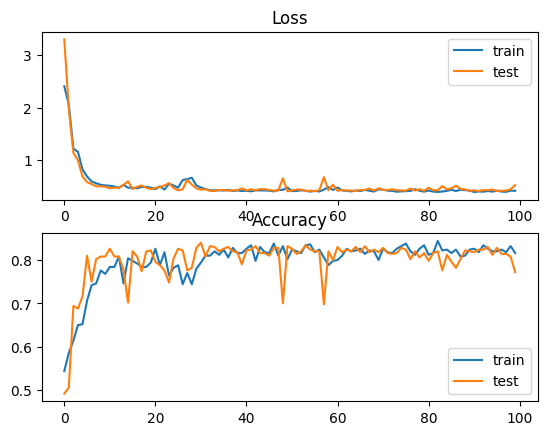

In [102]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Sparse Multiclass Cross-Entropy Loss

In [106]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose='auto')

Epoch 1/100
16/16 [==============================] - 1s 18ms/step - loss: 2.0879 - accuracy: 0.4820 - val_loss: 1.2108 - val_accuracy: 0.6900
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 1.0356 - accuracy: 0.6340 - val_loss: 0.7895 - val_accuracy: 0.7140
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7399 - accuracy: 0.6860 - val_loss: 0.5923 - val_accuracy: 0.7520
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7490 - accuracy: 0.6480 - val_loss: 0.6479 - val_accuracy: 0.6960
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7048 - accuracy: 0.6720 - val_loss: 0.5678 - val_accuracy: 0.7500
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6630 - accuracy: 0.6840 - val_loss: 0.5586 - val_accuracy: 0.7520
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6004 - accuracy: 0.7180 - val_loss: 0.6087 - val_accuracy: 0.7300
Epoch 8/100


16/16 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8160
Train: 0.832, Test: 0.816


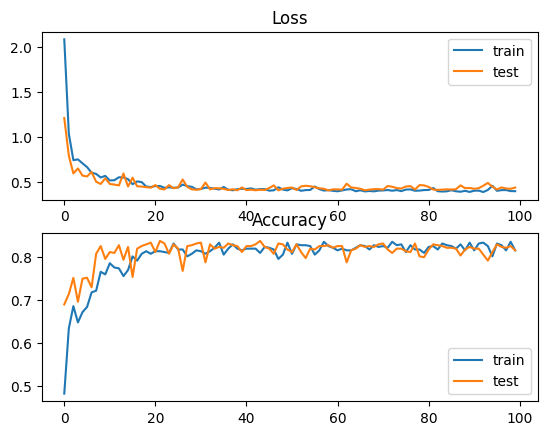

In [107]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose='auto')
_, test_acc = model.evaluate(testX, testy, verbose='auto')
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [113]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(8,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.682292 using {'batch_size': 10, 'epochs': 100}
0.628906 (0.068998) with: {'batch_size': 10, 'epochs': 10}
0.675781 (0.032369) with: {'batch_size': 10, 'epochs': 50}
0.682292 (0.017566) with: {'batch_size': 10, 'epochs': 100}
0.575521 (0.027866) with: {'batch_size': 20, 'epochs': 10}
0.682292 (0.019488) with: {'batch_size': 20, 'epochs': 50}
0.673177 (0.011201) with: {'batch_size': 20, 'epochs': 100}
0.522135 (0.086840) with: {'batch_size': 40, 'epochs': 10}
0.649740 (0.037783) with: {'batch_size': 40, 'epochs': 50}
0.661458 (0.027126) with: {'batch_size': 40, 'epochs': 100}
0.611979 (0.033804) with: {'batch_size': 60, 'epochs': 10}
0.627604 (0.033502) with: {'batch_size': 60, 'epochs': 50}
0.671875 (0.003189) with: {'batch_size': 60, 'epochs': 100}
0.570312 (0.068629) with: {'batch_size': 80, 'epochs': 10}
0.550781 (0.014616) with: {'batch_size': 80, 'epochs': 50}
0.627604 (0.035132) with: {'batch_size': 80, 'epochs': 100}
0.574219 (0.075003) with: {'batch_size': 100, 'epochs':

In [114]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(8,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# return model without compile
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = KerasClassifier(model=create_model, loss="binary_crossentropy", epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.699219 using {'optimizer': 'Nadam'}
0.626302 (0.042473) with: {'optimizer': 'SGD'}
0.684896 (0.012075) with: {'optimizer': 'RMSprop'}
0.531250 (0.107735) with: {'optimizer': 'Adagrad'}
0.397135 (0.059270) with: {'optimizer': 'Adadelta'}
0.694010 (0.018136) with: {'optimizer': 'Adam'}
0.678385 (0.027126) with: {'optimizer': 'Adamax'}
0.699219 (0.022097) with: {'optimizer': 'Nadam'}
